# Test

### import

In [1]:
import os

from sklearn import preprocessing
from nilearn import image, datasets, input_data, plotting

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
trainingList = ['../train/%s'%x for x in os.listdir('../train/')]; trainingList.sort()

In [3]:
testList = ['../test/%s'%x for x in os.listdir('../test/')]; testList.sort()

In [4]:
testList[-5:]

['../test/words_052_countries.nii.gz',
 '../test/words_056_animals.nii.gz',
 '../test/words_062_animals.nii.gz',
 '../test/words_066_tools.nii.gz',
 '../test/words_073_fruit.nii.gz']

### Wir extrahieren wieder die Daten aus den Bildern und glätten dabei mit 8mm

In [5]:
masker = input_data.NiftiMasker(mask_img='../masks/MNI152_T1_2mm_brain_mask.nii.gz',
                                smoothing_fwhm=8).fit()

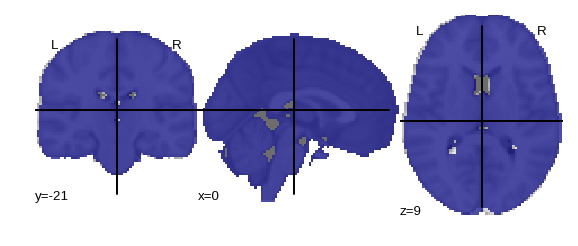

In [6]:
plotting.plot_roi(masker.mask_img_);

### Wir packen alle Daten in eine Tabelle

In [7]:
def makeBigDf(imgList,masker):
    bigDf = pd.DataFrame()
    for img in imgList:
        thisName = img.split('/')[-1].split('.')[0]
        cond,num,content = thisName.split('_')
        cont = '%s-%s' % (num,content)
        thisDf = pd.DataFrame(masker.transform(img))
        thisDf.index = [[cond],[cont]]
        bigDf = pd.concat([bigDf,thisDf])
    
    return bigDf

In [8]:
trainingDf = makeBigDf(trainingList,masker)

In [9]:
trainingDf

0         1         2         3         4       \
faces     004-family       -0.014855 -0.024355 -0.027687 -0.038244 -0.043698   
          007-friends       0.039879  0.048562  0.045989  0.044050  0.053268   
          013-movieactors  -0.017098 -0.003029  0.012788 -0.004869  0.008069   
          016-athletes      0.014403  0.030208  0.031041  0.016924  0.030390   
          024-tvactors     -0.059488 -0.045062 -0.038207 -0.052990 -0.046659   
          029-politicians   0.175263  0.160685  0.130618  0.191024  0.171995   
          033-lectureres    0.084158  0.086470  0.067347  0.078017  0.078071   
          036-teachers     -0.316378 -0.257089 -0.171713 -0.329105 -0.261805   
          042-family        0.077669  0.083928  0.075971  0.099875  0.106373   
          047-friends      -0.075450 -0.073649 -0.062537 -0.084905 -0.083546   
movements 005-badminton     0.049163  0.039504  0.026184  0.051281  0.042552   
          010-tennis       -0.046340 -0.071818 -0.098419 -0.026589 -0.053292   
          015-swimming     -0.104208 -0.095929 -0.075849 -0.085378 -0.079494   
          020-soccer        0.024488 -0.001562 -0.003851  0.036457  0.003897   
          025-highjump     -0.082450 -0.088737 -0.078928 -0.105719 -0.102011   
          030-climbing     -0.009813 -0.016283 -0.025030 -0.001519 -0.006817   
          035-huerdlerace  -0.193711 -0.152289 -0.074525 -0.234243 -0.181042   
          040-archery      -0.059648 -0.041449 -0.020979 -0.066441 -0.042687   
          045-ropeskipping  0.128563  0.121458  0.103920  0.141000  0.134892   
          050-juggling      0.296871  0.265031  0.196686  0.340038  0.290687   
places    003-citysquare    0.072830  0.061535  0.057645  0.065341  0.059341   
          008-market        0.098370  0.083839  0.070983  0.113654  0.097646   
          011-tramstation   0.010832  0.000137  0.001034 -0.006973 -0.011596   
          017-trainstation  0.027555  0.016808  0.016023  0.024159  0.019930   
          022-school        0.002312  0.008807  0.008743  0.010403  0.015416   
          026-church        0.223630  0.188620  0.125171  0.268114  0.221804   
          032-basement     -0.041100 -0.046069 -0.050791 -0.060103 -0.073092   
          038-promenade    -0.163325 -0.177723 -0.180129 -0.162763 -0.162859   
          041-cityofkiel   -0.117256 -0.090441 -0.047598 -0.122760 -0.089177   
          049-univesity     0.187252  0.150620  0.097614  0.218440  0.170987   
rest      001-rest         -0.074891 -0.047138 -0.026351 -0.070407 -0.040189   
          009-rest          0.107405  0.101262  0.094894  0.091795  0.087839   
          014-rest          0.101808  0.115414  0.115091  0.147143  0.150698   
          019-rest          0.080877  0.059017  0.038219  0.084107  0.062782   
          023-rest          0.018406  0.050442  0.064114 -0.005505  0.033575   
          027-rest          0.102956  0.102810  0.097533  0.136710  0.132491   
          031-rest          0.081747  0.062045  0.033709  0.060634  0.043437   
          037-rest         -0.154840 -0.131709 -0.099935 -0.171588 -0.141749   
          043-rest         -0.020974 -0.009851 -0.000733 -0.022217 -0.007715   
          046-rest         -0.046426 -0.043535 -0.024479 -0.082196 -0.067649   
words     002-animals      -0.142396 -0.131228 -0.121068 -0.134855 -0.129466   
          006-tools        -0.020244 -0.019242 -0.019718 -0.069268 -0.069323   
          012-cities       -0.012526 -0.008699 -0.001112  0.009196  0.011046   
          018-countries    -0.088297 -0.088354 -0.090098 -0.112259 -0.116504   
          021-occupations   0.033783  0.024877  0.008248  0.037207  0.028291   
          028-fruits       -0.048764 -0.068557 -0.075046 -0.064613 -0.086334   
          034-clothing     -0.003983 -0.012891 -0.020012  0.008355 -0.003304   
          039-vegetables   -0.107487 -0.080969 -0.036537 -0.138516 -0.121899   
          044-furniture    -0.042130 -0.041882 -0.042831 -0.058676 -0.060160   
          048-colors       -0.

In [10]:
meanTrainingDf = trainingDf.groupby(level=0).mean()

In [11]:
meanTrainingDf

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
faces,-0.009190,0.000667,0.006361,-0.008022,0.001246,-0.015660,-0.006670,-0.000523,-0.005715,-0.004810,...,-0.010532,-0.015145,0.003356,-0.007788,-0.015298,-0.018877,0.013539,0.001342,-0.006435,0.004723
movements,0.000291,-0.004207,-0.005079,0.004889,0.000669,0.013782,0.008536,0.003935,0.011485,0.019878,...,0.014953,0.026591,-0.020739,-0.025195,-0.024513,-0.021705,-0.008296,-0.011598,-0.009594,0.003931
places,0.030110,0.019613,0.009869,0.034751,0.024840,0.043088,0.037274,0.029685,0.037395,-0.024724,...,0.021249,0.026244,0.020824,0.011342,0.007505,0.007904,0.023498,0.018028,0.017178,0.022385
rest,0.019607,0.025876,0.029206,0.016848,0.025352,-0.002390,0.006009,0.015615,-0.009085,0.022037,...,-0.004928,-0.019125,0.020533,0.025296,0.027571,0.028363,0.004747,0.005455,0.004201,-0.017883
words,-0.043500,-0.043944,-0.042280,-0.052437,-0.055666,-0.044689,-0.050390,-0.053713,-0.040270,-0.012379,...,-0.029957,-0.030430,-0.025893,-0.005730,0.003045,0.003760,-0.035415,-0.014916,-0.005968,-0.014486


### make Mask

In [14]:
def mergeRois(roiDf):
    copyDf = roiDf.copy()
    #wir summieren die 5 Masken auf, jetzt können wir für jeden
    # Voxel Werte zwischen Null und Fünf haben (0: keine der Masken
    # enthält das Voxel, 5: alle Masken enthalten das Voxel)
    sumDf = pd.DataFrame( copyDf.sum(axis=0) )
    # uns interessieren alle Voxel mit Werten größer Null (also: mindestens
    # eine der Masken enthält das Voxel)
    sumDf[sumDf>0] = 1
    sumDf[sumDf<1] = 0
    return sumDf.T

In [15]:
def makeMasks(meanDf,pc):
    roiDict = {}
    # wir machen uns eine Kopie unserer gemittelten Aktivierngstabelle,
    # damit wir sie beabeiten können
    copyDf = meanDf.copy()
    # für jede Bedingung
    for cond in copyDf.index:
        # wir wählen die Bedingung aus
        thisCond = copyDf.ix[cond]
        # wir schauen, welcher Wert einem vordefinierten Percentil entspricht
        # merke: Percentil 84 würde z.B. bedeuten, dass der Wert höher ist als
        # von 84% der restlichen Voxel
        thisPercentile = np.percentile(thisCond,pc)
        # wir sagen, dass alles was dadrunter fällt zu Null wird
        thisCond[thisCond<thisPercentile]=0
        # wir sagen, dass alles was nicht zu Null geworden ist 
        # (also über dem Percentil lag), zu eins wird
        thisCond[thisCond>0] = 1
        # wir haben eine binäre Make (0 und 1 ) und fügen sie unserer Liste
        # mit Masken (eine pro Bedingung) hinzu
        roiDict[cond] = thisCond
    
    # wenn wir fertig sind, machen wird daraus eine Tabelle
    roiDf = pd.DataFrame(roiDict).T
    # Ausgabe der Tabelle
    return roiDf

In [16]:
def makeMasker(voxelPc,smoo,imgList=trainingList,masker=masker):
    # die whole-brain daten erstellen
    blockDf = makeBigDf(imgList,masker)

    meanDf = blockDf.groupby(level=0).mean()
    # masken aus der Mittelung der ersten Hälfte erstellen
    roiDf = makeMasks(meanDf,voxelPc)
    # masken zusammenführen
    thisBigRoi = mergeRois(roiDf)
    # masken zu bildern machen
    thisBigRoiImg = masker.inverse_transform(thisBigRoi.values)
    # masker-objekt erstellen
    roiMasker = input_data.NiftiMasker(mask_img=thisBigRoiImg,smoothing_fwhm=smoo).fit()
    
    return roiMasker

In [17]:
roiMasker = makeMasker(99,0)

In [18]:
roiMasker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f7c73c53a90>,
      mask_strategy='background', memory=Memory(cachedir=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=0,
      standardize=False, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

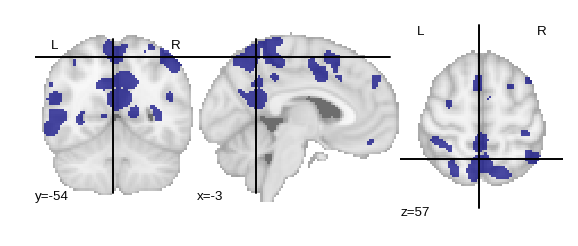

In [19]:
plotting.plot_roi(roiMasker.mask_img_)

## predict test data

In [20]:
trainingDf = makeBigDf(trainingList,roiMasker)

In [21]:
trainingDf.shape

(50, 11025)

In [22]:
trainingDf

0         1         2         3         4      \
faces     004-family       -0.508922 -0.430495 -0.463690  0.595018 -0.472822   
          007-friends      -0.473313 -0.388525  0.150142  0.607543 -0.524587   
          013-movieactors  -0.648244 -0.770180 -0.977148 -0.096664 -0.725534   
          016-athletes     -0.064868 -0.035615 -0.012362  1.176524 -0.043713   
          024-tvactors     -0.093735 -0.025866  0.070429  1.194132 -0.077919   
          029-politicians   0.210356  0.147825 -0.095647  0.732434  0.142854   
          033-lectureres    0.161206  0.096387  0.256376  1.100385  0.175259   
          036-teachers     -0.002432 -0.049186 -0.764320  0.289718 -0.125405   
          042-family       -0.103346 -0.126568  0.087796  0.061173 -0.088556   
          047-friends      -0.360751 -0.375327 -0.331440  1.340103 -0.345569   
movements 005-badminton     0.432061  0.376116  0.148636 -0.172586  0.445341   
          010-tennis       -0.347584 -0.371676 -0.217101  0.724066 -0.340240   
          015-swimming     -0.544522 -0.566075 -0.241412  0.156606 -0.519103   
          020-soccer       -0.270458 -0.245896 -0.456396  0.730937 -0.251201   
          025-highjump      0.524303  0.457175  0.128422 -0.667590  0.507172   
          030-climbing      0.096855  0.084754  0.111440 -1.056337  0.116914   
          035-huerdlerace  -0.046422 -0.009558 -0.349459 -0.750438 -0.134525   
          040-archery      -0.209789 -0.249041 -0.327539  0.290592 -0.310952   
          045-ropeskipping  0.113925  0.080123  0.030343 -0.451035  0.061774   
          050-juggling     -0.074180  0.033356  0.329701 -1.065034 -0.104985   
places    003-citysquare    0.187599  0.082838 -0.099974 -0.116386  0.100997   
          008-market       -0.086056 -0.072361 -0.190287 -0.923330 -0.076118   
          011-tramstation   0.104579  0.181014  0.402437 -0.175967  0.131005   
          017-trainstation  0.297499  0.297306  0.214554 -0.428831  0.271825   
          022-school       -0.354163 -0.376493 -0.235718 -0.887281 -0.385857   
          026-church       -0.494137 -0.423709  0.170058 -0.441100 -0.482690   
          032-basement     -0.375131 -0.357997 -0.088335  0.281907 -0.346405   
          038-promenade    -0.748298 -0.749794 -0.590013 -0.009515 -0.717761   
          041-cityofkiel    0.540850  0.496440  0.181509  0.113790  0.546987   
          049-univesity    -0.570714 -0.525344 -0.343873 -0.441242 -0.574689   
rest      001-rest          0.111477  0.131862  0.020791 -0.608265  0.160770   
          009-rest          0.237501  0.246704  0.089713 -0.082528  0.231201   
          014-rest         -0.355404 -0.295453 -0.244010 -0.682304 -0.331629   
          019-rest         -0.821859 -0.798123 -0.389591  0.066486 -0.839113   
          023-rest          0.340105  0.323689  0.349262 -1.075810  0.351014   
          027-rest          0.584764  0.640441  0.592013 -0.452867  0.578439   
          031-rest         -0.475444 -0.570100 -0.544209  0.455397 -0.458992   
          037-rest         -0.590733 -0.623125 -0.775451 -0.732489 -0.560458   
          043-rest         -0.114103 -0.086867 -0.021242 -0.394772 -0.107017   
          046-rest         -0.260061 -0.275125 -0.461545  0.185071 -0.297004   
words     002-animals       0.154115  0.211451  0.035488  0.654125  0.182592   
          006-tools         0.640004  0.577722  0.731258 -0.332466  0.602224   
          012-cities        0.450240  0.452828  0.372904 -0.092990  0.458652   
          018-countries     0.069880  0.077333 -0.044253 -0.087661  0.073007   
          021-occupations   0.832993  0.830748  0.645714  0.874127  0.879324   
          028-fruits        0.419631  0.499564  0.583269  0.263838  0.490698   
          034-clothing      0.454708  0.486777  0.259596 -0.338724  0.442761   
          039-vegetables    0.905594  0.920969  0.755600  0.681238  0.994041   
          044-furniture     0.163151  0.148992  0.606590  0.716669  0.287624   
          048-colors        0.9

In [23]:
meanTrainingDf = trainingDf.groupby(level=0).mean()

In [24]:
meanTrainingDf

,0,1,2,3,4,5,6,7,8,9,...,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024
faces,-0.188405,-0.195755,-0.207987,0.700037,-0.208599,-0.220722,-0.250206,-0.187005,-0.187359,-0.196359,...,0.192631,0.179101,0.154325,0.128452,0.133966,0.344792,0.537049,0.507729,0.482527,0.144543
movements,-0.032581,-0.041072,-0.084336,-0.226082,-0.052981,-0.030411,-0.028274,-0.064838,-0.062806,-0.072826,...,-0.436837,-0.162871,-0.097210,-0.094950,-0.001045,-0.487006,-0.213283,-0.132702,-0.136603,-0.134005
places,-0.149797,-0.144810,-0.057964,-0.302795,-0.153271,-0.151480,-0.153091,-0.174614,-0.173234,-0.183217,...,-0.007643,-0.305411,-0.326315,-0.318939,-0.288448,-0.108021,-0.301413,-0.297441,-0.328737,-0.149773
rest,-0.134376,-0.130610,-0.138427,-0.332208,-0.127279,-0.126482,-0.123410,-0.122740,-0.126339,-0.115060,...,-0.448992,-0.590633,-0.537892,-0.513936,-0.430073,-0.127932,-0.621259,-0.649239,-0.669632,0.139029
words,0.506788,0.515152,0.479892,0.244381,0.541393,0.519334,0.541931,0.556080,0.556703,0.576153,...,0.693892,0.888516,0.816893,0.810485,0.600241,0.379016,0.584442,0.559284,0.643294,0.056042


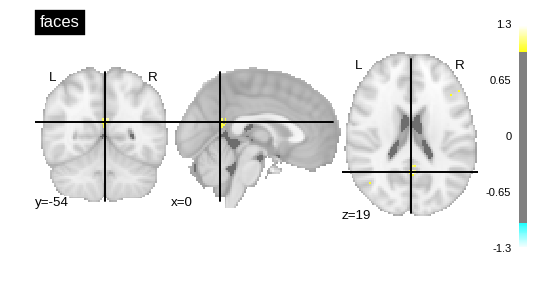

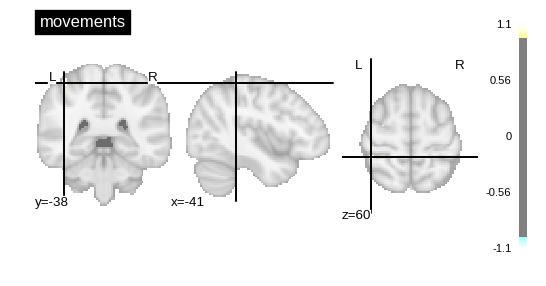

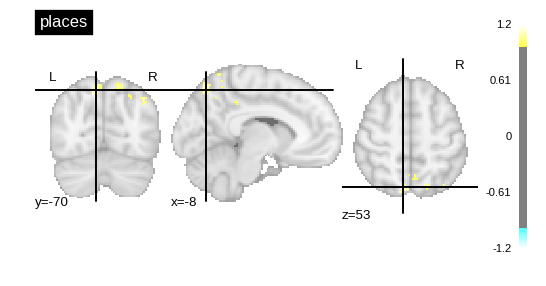

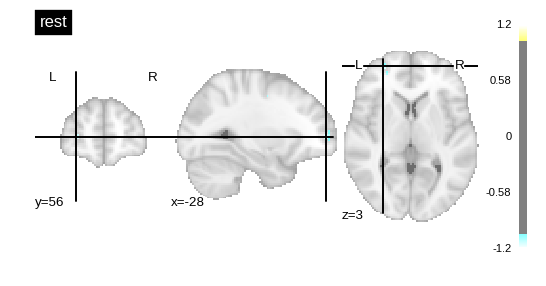

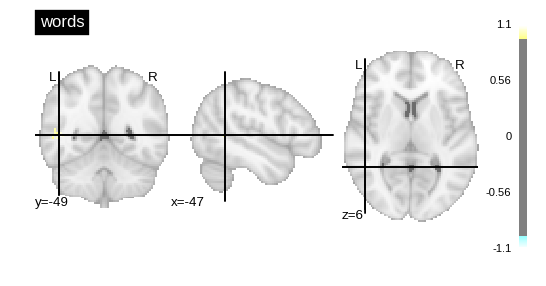

In [25]:
for cond in meanTrainingDf.index:
    fig,ax1 = plt.subplots(1,1,figsize=(8,4))
    thisIm = roiMasker.inverse_transform(meanTrainingDf.ix[cond])
    plotting.plot_stat_map(thisIm,title=cond,threshold=1.,axes=ax1)
    plt.show()

In [26]:
testDf = makeBigDf(testList,roiMasker)

In [27]:
testDf.shape

(25, 11025)

In [28]:
testDf

0         1         2         3         4      \
faces     051-movieactors -0.735554 -0.707860 -0.514222  1.298323 -0.709339   
          058-athletes     0.075175  0.048161  0.231946  0.508769  0.113602   
          064-family      -0.329418 -0.313266 -0.335616  0.864882 -0.386445   
          067-friends     -0.621211 -0.645567 -0.616614  0.215454 -0.662048   
          074-politicians -0.436710 -0.409475 -0.451322  0.781938 -0.411691   
movements 055-badminton    0.343441  0.299226 -0.109198 -0.643727  0.295705   
          060-swimming     0.133766  0.114637 -0.166031 -0.221302  0.123144   
          065-badminton    0.341140  0.258455  0.471004 -0.723911  0.271775   
          070-tennis      -0.192888 -0.196865 -0.256040  0.061011 -0.125242   
          075-climbing    -0.167303 -0.159743 -0.137482 -0.947683 -0.178299   
places    054-market      -0.168037 -0.135291  0.032977 -0.377219 -0.163757   
          059-school       0.156333  0.066734 -0.055847 -0.931856  0.136280   
          063-citysquare  -0.304952 -0.333064  0.264252 -0.082398 -0.319513   
          068-market       0.193820  0.117661  0.215136 -0.608907  0.179747   
          071-church       0.466098  0.427304 -0.096933 -0.533634  0.516998   
rest      053-rest        -0.343978 -0.377100 -0.290070  0.433828 -0.351160   
          057-rest        -0.282685 -0.226300 -0.357233 -0.750901 -0.323303   
          061-rest        -0.704976 -0.669964 -0.308623  0.532446 -0.669451   
          069-rest        -0.582216 -0.512708 -0.045695  1.191647 -0.547269   
          072-rest         0.075561  0.057652  0.238818  0.231074  0.025583   
words     052-countries    0.216116  0.274523  0.483228 -0.169693  0.301646   
          056-animals      0.921197  0.902560  0.133035 -0.680453  0.902838   
          062-animals      0.322520  0.404614  0.523403  0.564703  0.385016   
          066-tools        0.565128  0.609258  0.559164 -0.014742  0.488389   
          073-fruit        0.659919  0.732789  0.527016  0.254902  0.711955   

                              5         6         7         8         9      \
faces     051-movieactors -0.705357 -0.710256 -0.696018 -0.682859 -0.590596   
          058-athletes     0.061396  0.116858  0.186045  0.193396  0.183694   
          064-family      -0.263418 -0.179242 -0.405841 -0.402410 -0.405722   
          067-friends     -0.732442 -0.692232 -0.584938 -0.583723 -0.623532   
          074-politicians -0.406602 -0.506006 -0.406735 -0.403319 -0.374251   
movements 055-badminton    0.297633  0.193343  0.314576  0.318820  0.216459   
          060-swimming     0.075585  0.102279  0.113926  0.112392  0.089787   
          065-badminton    0.349661  0.378032  0.243158  0.243032  0.133734   
          070-tennis      -0.023195  0.002261 -0.171693 -0.175705 -0.212227   
          075-climbing    -0.176997 -0.282787 -0.220660 -0.222863 -0.194152   
places    054-market      -0.109981 -0.087486 -0.196343 -0.187055 -0.122875   
          059-school       0.052333 -0.032798  0.162228  0.149705  0.030791   
          063-citysquare  -0.283407 -0.225781 -0.352008 -0.364729 -0.374660   
          068-market       0.156232  0.152686  0.155955  0.154919  0.063743   
          071-church       0.392608  0.365861  0.534924  0.535286  0.506720   
rest      053-rest        -0.344130 -0.346081 -0.389630 -0.394992 -0.423041   
          057-rest        -0.301565 -0.249062 -0.293589 -0.294768 -0.266045   
          061-rest        -0.669042 -0.613706 -0.657216 -0.659443 -0.653262   
          069-rest        -0.392307 -0.371694 -0.615412 -0.612780 -0.535591   
          072-rest        -0.002612  0.111175  0.060361  0.048971  0.041365   
words     052-countries    0.348948  0.356738  0.235910  0.221226  0.289923   
          056-animals      0.681489  0.578851  0.984139  0.985640  0.986640   
          062-animals      0.498293  0.429852  0.341385  0.346423  0.448246   
          066-tools        0.335841  0.290887  0.571360  0.577558  0.615920   


In [29]:
blockCorrDf = pd.DataFrame(np.corrcoef(trainingDf,testDf)[50:,:50],
                           index=testDf.index,
                           columns=trainingDf.index)

In [30]:
myOrder = ['words','movements','places','faces','rest']
blockCorrDf = blockCorrDf.reindex(myOrder,level=0)
blockCorrDf = blockCorrDf[myOrder]

In [31]:
blockCorrDf

words                                     \
                          002-animals 006-tools 012-cities 018-countries   
words     052-countries      0.104791  0.193974   0.038989      0.323028   
          056-animals        0.442158  0.521674   0.500867      0.374380   
          062-animals        0.605720  0.516941   0.466952      0.551571   
          066-tools          0.431270  0.655425   0.560798      0.298579   
          073-fruit          0.613327  0.642735   0.547610      0.522560   
movements 055-badminton     -0.298389 -0.340566  -0.449558     -0.084585   
          060-swimming      -0.314587 -0.102267  -0.240044     -0.220676   
          065-badminton     -0.236974 -0.400441  -0.515875     -0.065799   
          070-tennis        -0.133095 -0.279995  -0.513313      0.091996   
          075-climbing      -0.187496 -0.319098  -0.426735      0.091752   
places    054-market         0.124670 -0.190697  -0.071008      0.154677   
          059-school        -0.053318 -0.287773  -0.155678     -0.059489   
          063-citysquare    -0.301152 -0.434274  -0.239268     -0.392232   
          068-market        -0.238824 -0.425086  -0.302827     -0.229188   
          071-church        -0.034979 -0.137117   0.093744     -0.142140   
faces     051-movieactors    0.125755  0.145681   0.099660      0.100055   
          058-athletes       0.272761  0.308755   0.318071      0.184737   
          064-family        -0.063212  0.007502  -0.022435     -0.080202   
          067-friends        0.095014  0.104631   0.319238     -0.126989   
          074-politicians    0.196666  0.224839   0.244820      0.251218   
rest      053-rest          -0.309214 -0.126291  -0.069237     -0.419179   
          057-rest          -0.178510 -0.043209  -0.215578     -0.079388   
          061-rest          -0.238013  0.006119   0.093587     -0.371613   
          069-rest          -0.223017 -0.085575  -0.024582     -0.368776   
          072-rest          -0.222529  0.040744   0.045356     -0.304853   

                                                                   \
                          021-occupations 028-fruits 034-clothing   
words     052-countries         -0.064692   0.172837     0.259579   
          056-animals            0.614445   0.596588     0.186674   
          062-animals            0.498703   0.650883     0.305590   
          066-tools              0.663557   0.582752     0.510311   
          073-fruit              0.535795   0.735929     0.358354   
movements 055-badminton         -0.319941  -0.305173    -0.060489   
          060-swimming          -0.267265  -0.191829     0.191858   
          065-badminton         -0.496077  -0.271469    -0.139950   
          070-tennis            -0.407772  -0.092629    -0.128999   
          075-climbing          -0.393966  -0.226428    -0.280942   
places    054-market            -0.110147  -0.010949    -0.482464   
          059-school            -0.136907  -0.126644    -0.533947   
          063-citysquare        -0.266640  -0.490751    -0.325988   
          068-market            -0.367614  -0.370528    -0.511942   
          071-church            -0.035132  -0.145506    -0.347446   
faces     051-movieactors        0.086229   0.103654     0.073107   
          058-athletes           0.506269   0.422169     0.052516   
          064-family            -0.031946  -0.070669     0.151033   
          067-friends            0.332870   0.038233    -0.005849   
          074-politicians        0.351081   0.208035     0.108410   
rest      053-rest              -0.174201  -0.414387     0.128092   
          057-rest              -0.277547  -0.050902     0.226253   
          061-rest              -0.067943  -0.230873     0.265167   
          069-rest              -0.122075  -0.249167     0.162303   
          072-rest              -0.013893  -0.177624     0.234938   

                                                                     ...     \
                          039-vegeta

In [32]:
blockCorrDf

words                                     \
                          002-animals 006-tools 012-cities 018-countries   
words     052-countries      0.104791  0.193974   0.038989      0.323028   
          056-animals        0.442158  0.521674   0.500867      0.374380   
          062-animals        0.605720  0.516941   0.466952      0.551571   
          066-tools          0.431270  0.655425   0.560798      0.298579   
          073-fruit          0.613327  0.642735   0.547610      0.522560   
movements 055-badminton     -0.298389 -0.340566  -0.449558     -0.084585   
          060-swimming      -0.314587 -0.102267  -0.240044     -0.220676   
          065-badminton     -0.236974 -0.400441  -0.515875     -0.065799   
          070-tennis        -0.133095 -0.279995  -0.513313      0.091996   
          075-climbing      -0.187496 -0.319098  -0.426735      0.091752   
places    054-market         0.124670 -0.190697  -0.071008      0.154677   
          059-school        -0.053318 -0.287773  -0.155678     -0.059489   
          063-citysquare    -0.301152 -0.434274  -0.239268     -0.392232   
          068-market        -0.238824 -0.425086  -0.302827     -0.229188   
          071-church        -0.034979 -0.137117   0.093744     -0.142140   
faces     051-movieactors    0.125755  0.145681   0.099660      0.100055   
          058-athletes       0.272761  0.308755   0.318071      0.184737   
          064-family        -0.063212  0.007502  -0.022435     -0.080202   
          067-friends        0.095014  0.104631   0.319238     -0.126989   
          074-politicians    0.196666  0.224839   0.244820      0.251218   
rest      053-rest          -0.309214 -0.126291  -0.069237     -0.419179   
          057-rest          -0.178510 -0.043209  -0.215578     -0.079388   
          061-rest          -0.238013  0.006119   0.093587     -0.371613   
          069-rest          -0.223017 -0.085575  -0.024582     -0.368776   
          072-rest          -0.222529  0.040744   0.045356     -0.304853   

                                                                   \
                          021-occupations 028-fruits 034-clothing   
words     052-countries         -0.064692   0.172837     0.259579   
          056-animals            0.614445   0.596588     0.186674   
          062-animals            0.498703   0.650883     0.305590   
          066-tools              0.663557   0.582752     0.510311   
          073-fruit              0.535795   0.735929     0.358354   
movements 055-badminton         -0.319941  -0.305173    -0.060489   
          060-swimming          -0.267265  -0.191829     0.191858   
          065-badminton         -0.496077  -0.271469    -0.139950   
          070-tennis            -0.407772  -0.092629    -0.128999   
          075-climbing          -0.393966  -0.226428    -0.280942   
places    054-market            -0.110147  -0.010949    -0.482464   
          059-school            -0.136907  -0.126644    -0.533947   
          063-citysquare        -0.266640  -0.490751    -0.325988   
          068-market            -0.367614  -0.370528    -0.511942   
          071-church            -0.035132  -0.145506    -0.347446   
faces     051-movieactors        0.086229   0.103654     0.073107   
          058-athletes           0.506269   0.422169     0.052516   
          064-family            -0.031946  -0.070669     0.151033   
          067-friends            0.332870   0.038233    -0.005849   
          074-politicians        0.351081   0.208035     0.108410   
rest      053-rest              -0.174201  -0.414387     0.128092   
          057-rest              -0.277547  -0.050902     0.226253   
          061-rest              -0.067943  -0.230873     0.265167   
          069-rest              -0.122075  -0.249167     0.162303   
          072-rest              -0.013893  -0.177624     0.234938   

                                                                     ...     \
                          039-vegeta

In [33]:
d = {}
for i in blockCorrDf.index:
    thisEntry = blockCorrDf.loc[i].sort_values(ascending=False)[:10]
    thisNum = pd.DataFrame( thisEntry ).loc[i[0]].shape[0]
    d[i] = thisNum
df = pd.DataFrame(d,index=['num']).T

In [34]:
df

num
faces     051-movieactors    8
          058-athletes       6
          064-family         5
          067-friends        8
          074-politicians    9
movements 055-badminton      9
          060-swimming       3
          065-badminton      9
          070-tennis         9
          075-climbing       5
places    054-market         9
          059-school         9
          063-citysquare     8
          068-market         8
          071-church         9
rest      053-rest           8
          057-rest           8
          061-rest           8
          069-rest           9
          072-rest           9
words     052-countries      5
          056-animals        8
          062-animals        9
          066-tools          9
          073-fruit          9

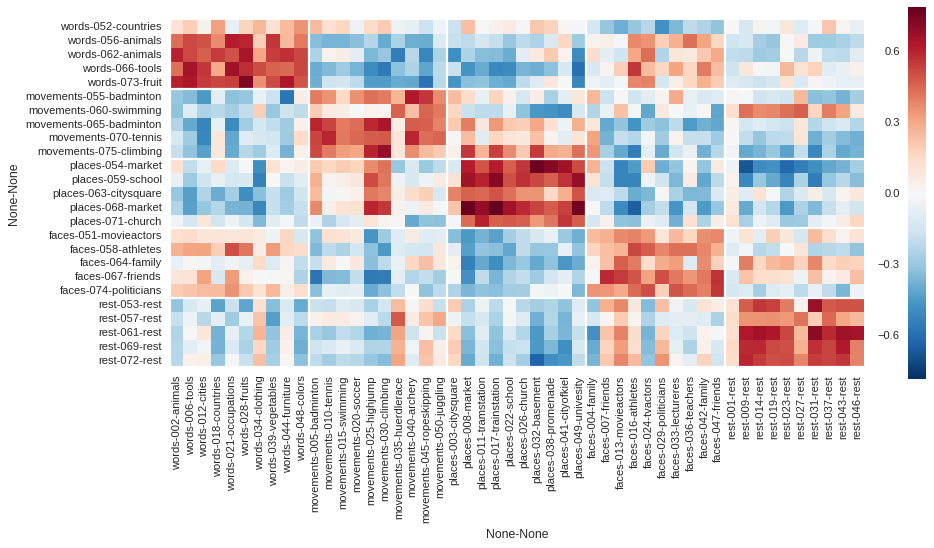

In [35]:
fig,ax1 = plt.subplots(figsize=(14,6))

sns.heatmap(blockCorrDf,annot=False,square=True,ax=ax1)

for i in range(0,25,5):
    ax1.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    ax1.axvline(i,color='white',linewidth=2)

sns.despine(left=True,bottom=True)
plt.show()

Get highest correlation, to control colorbar range

In [37]:
myMax=abs(blockCorrDf).max().max()

In [38]:
myMax

0.7860775967105489

In [39]:
thisMax = (myMax+0.05).round(1)

In [40]:
thisMax

0.8

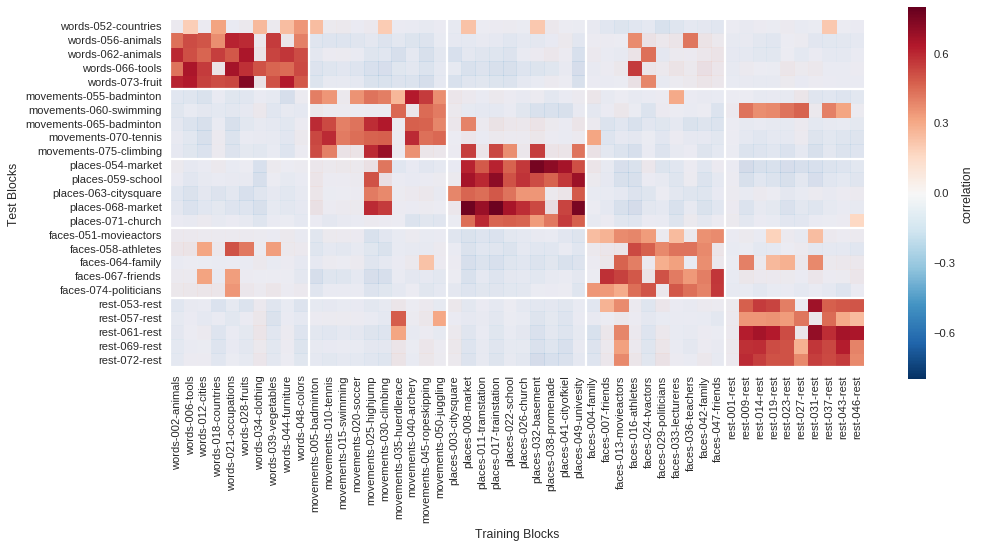

In [41]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr10 = blockCorrDf.loc[i].sort_values(ascending=False)[9]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]>=nr10 ).T
    bigDf = pd.concat([bigDf,thisDf])
    

plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf[bigDf==False],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=0.1,cbar=False)
sns.heatmap(blockCorrDf[bigDf==True],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=1,
            cbar_kws={"label": "correlation"} )
plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    plt.axvline(i,color='white',linewidth=2)
#plt.savefig('../figs/blockWiseHeat.png',dpi=300,bbox_inches='tight')
plt.show()

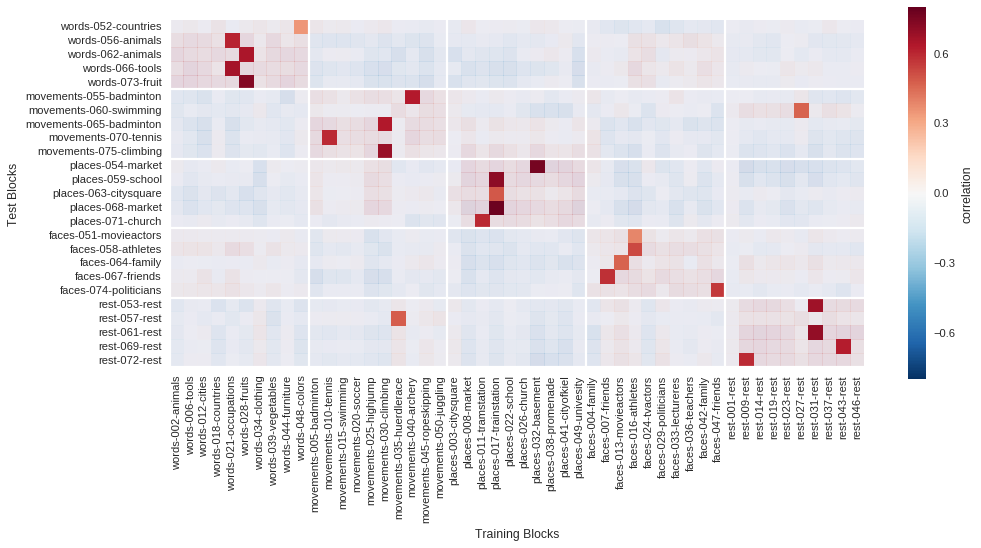

In [42]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr1 = blockCorrDf.loc[i].sort_values(ascending=False)[0]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]==nr1 ).T
    bigDf = pd.concat([bigDf,thisDf])
    

plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf[bigDf==False],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=0.1,cbar=False)
sns.heatmap(blockCorrDf[bigDf==True],annot=False,square=True,vmin=-0.6,vmax=thisMax,alpha=1,
            cbar_kws={"label": "correlation"} )
plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    plt.axvline(i,color='white',linewidth=2)
#plt.savefig('../figs/blockWiseHeat.png',dpi=300,bbox_inches='tight')
plt.show()

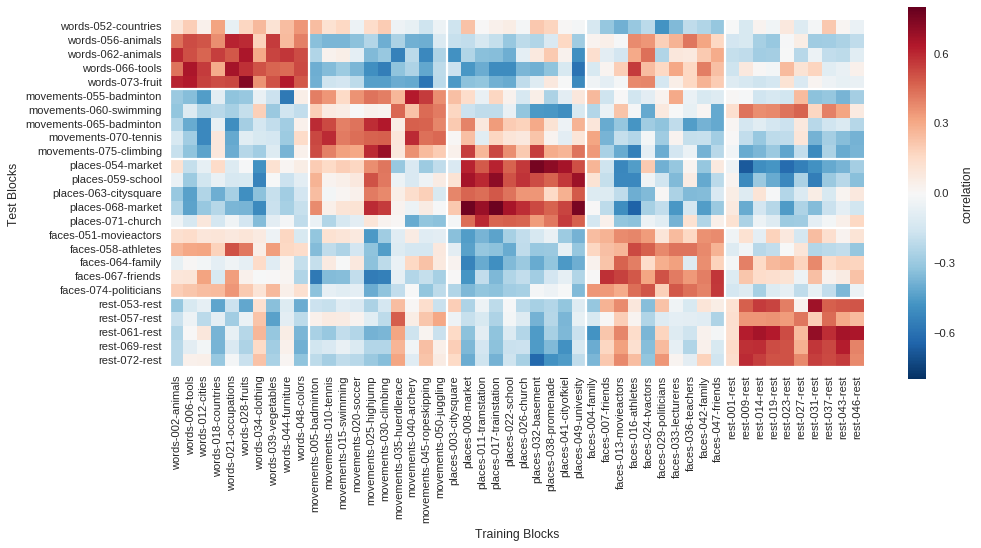

In [43]:
bigDf = pd.DataFrame()
for i in blockCorrDf.index:
    nr1 = blockCorrDf.loc[i].sort_values(ascending=False)[0]
    thisDf = pd.DataFrame( blockCorrDf.loc[i]==nr1 ).T
    bigDf = pd.concat([bigDf,thisDf])
    

plt.figure(figsize=(14,6))

sns.heatmap(blockCorrDf,annot=False,square=True,vmin=-0.6,vmax=thisMax,
            cbar_kws={"label": "correlation"} )

plt.xlabel('Training Blocks')
plt.ylabel('Test Blocks')
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,50,10):
    plt.axvline(i,color='white',linewidth=2)
plt.savefig('../figs/blockWiseHeat.png',dpi=300,bbox_inches='tight')
plt.show()

In [44]:
d = {}
for i in blockCorrDf.index:
    condition,content = i
    fuDf = pd.DataFrame( blockCorrDf.loc[i].sort_values(ascending=False)[:10] )
    top10 = [fuDf.index.levels[0][x] for x in fuDf.index.labels[0]]
    numHits = np.array([int(x == condition) for x in top10]).sum()
    d[i] = numHits

In [45]:
pd.DataFrame(d,index=['numhits']).T

numhits
faces     051-movieactors        8
          058-athletes           6
          064-family             5
          067-friends            8
          074-politicians        9
movements 055-badminton          9
          060-swimming           3
          065-badminton          9
          070-tennis             9
          075-climbing           5
places    054-market             9
          059-school             9
          063-citysquare         8
          068-market             8
          071-church             9
rest      053-rest               8
          057-rest               8
          061-rest               8
          069-rest               9
          072-rest               9
words     052-countries          5
          056-animals            8
          062-animals            9
          066-tools              9
          073-fruit              9

In [46]:
d = {}
for i in blockCorrDf.index:
    thisDf = blockCorrDf.loc[i]
    cond,content = thisDf.idxmax()
    d[i] = {'condition':cond,'content':content}
df = pd.DataFrame(d).T
df

condition           content
faces     051-movieactors      faces      016-athletes
          058-athletes         faces      016-athletes
          064-family           faces   013-movieactors
          067-friends          faces       007-friends
          074-politicians      faces       047-friends
movements 055-badminton    movements       040-archery
          060-swimming          rest          027-rest
          065-badminton    movements      030-climbing
          070-tennis       movements        010-tennis
          075-climbing     movements      030-climbing
places    054-market          places      032-basement
          059-school          places  017-trainstation
          063-citysquare      places  017-trainstation
          068-market          places  017-trainstation
          071-church          places   011-tramstation
rest      053-rest              rest          031-rest
          057-rest         movements   035-huerdlerace
          061-rest              rest          031-rest
          069-rest              rest          043-rest
          072-rest              rest          009-rest
words     052-countries        words        048-colors
          056-animals          words   021-occupations
          062-animals          words        028-fruits
          066-tools            words   021-occupations
          073-fruit            words        028-fruits

In [47]:
myCorrDf = pd.DataFrame(np.corrcoef(meanTrainingDf,testDf)[5:,:5],
                       index=testDf.index,
                       columns=meanTrainingDf.index)

In [48]:
myOrder = ['words','movements','places','faces','rest']
myCorrDf = myCorrDf.reindex(myOrder,level=0)
myCorrDf = myCorrDf[myOrder]

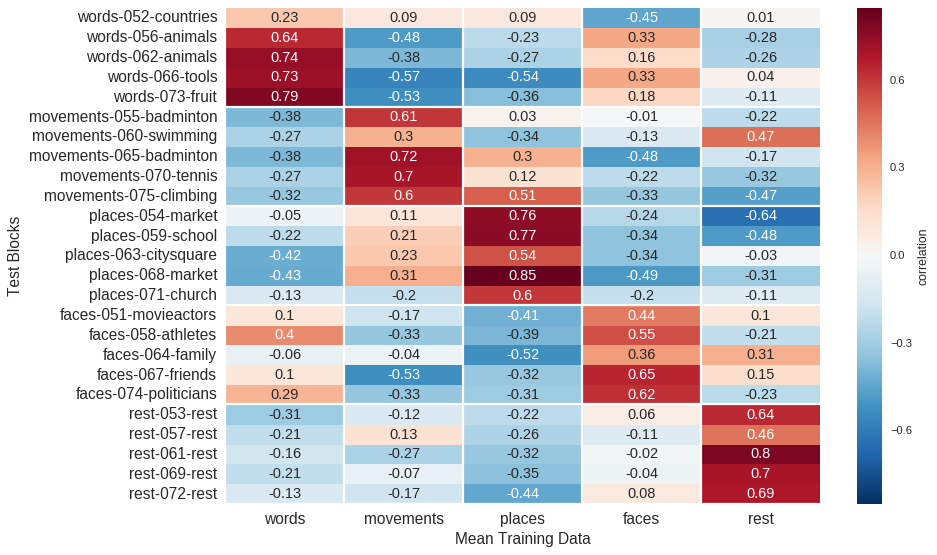

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(myCorrDf.round(2),annot=True,
            cbar_kws={"label":"correlation"},
            annot_kws={"fontsize": 13} )
for i in range(0,25,5):
    plt.axhline(i,color='white',linewidth=2)
for i in range(0,5,1):
    plt.axvline(i,color='white',linewidth=2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Mean Training Data',fontsize=14)
plt.ylabel('Test Blocks',fontsize=14)

plt.savefig('../figs/testMeanHeat.png',dpi=300,bbox_inches='tight')
plt.show()

### Entscheidungsregel (winner takes all)

In [50]:
def makeCorrPred(myCorrDf):
    d = {}
    # wir gehen durch jede Zeile
    for cond,num in myCorrDf.index:
        # wir wählen diese Zeile aus
        thisDf = myCorrDf.ix[cond].ix[num]
        # wir wählen die Spalte mit dem höhsten Wert aus
        winner = thisDf.idxmax()
        # wir schreiben einen eintrag mit folgenden infos:
        # real : die tatsächliche bedingung (aus der zeile)
        # winner: die spalte mit der höchsten korrelation
        # hit: wir fragen, ob real und winner identisch sind (kann wahr oder falsch sein)
        d[num] = {'real':cond, 'winner':winner,'hit':cond==winner  }
        
    # wir packen das ganze in eine tabelle, die wir nett formatieregn
    predDf = pd.DataFrame(d).T

    # wir rechnen aus, in wie viel prozent der Fälle wir richig lagen
    percentCorrect = np.mean( [int(x) for x in predDf['hit']] )*100
    
    return predDf,percentCorrect

In [51]:
corrPredDf,corrPcCorrect = makeCorrPred(myCorrDf)

In [52]:
corrPredDf

,hit,real,winner
051-movieactors,True,faces,faces
052-countries,True,words,words
053-rest,True,rest,rest
054-market,True,places,places
055-badminton,True,movements,movements
056-animals,True,words,words
057-rest,True,rest,rest
058-athletes,True,faces,faces
059-school,True,places,places
060-swimming,False,movements,rest


In [53]:
def makeConfusion(corrDf):
    d = {}
    for i in corrDf.index:
        correct = i[0]
        predicted = corrDf.loc[i].idxmax()
        try:
            d[correct].append(predicted)
        except:
            d[correct] = [predicted]
    df = pd.DataFrame(d)
    
    d = {}
    for true in df.columns:
        d[true] = {}
        for pred in df.columns:
            d[true][pred] = (df[true]==pred).mean()

    confDf = pd.DataFrame(d).T
    confDf.index= [['True']*len(confDf.index),confDf.index]

    confDf.columns= [['Predicted']*len(confDf.columns),confDf.columns]
    return confDf*100

In [54]:
confDf = makeConfusion(myCorrDf)

In [55]:
confDf

Predicted                               
                   faces movements places   rest  words
True faces         100.0       0.0    0.0    0.0    0.0
     movements       0.0      80.0    0.0   20.0    0.0
     places          0.0       0.0  100.0    0.0    0.0
     rest            0.0       0.0    0.0  100.0    0.0
     words           0.0       0.0    0.0    0.0  100.0

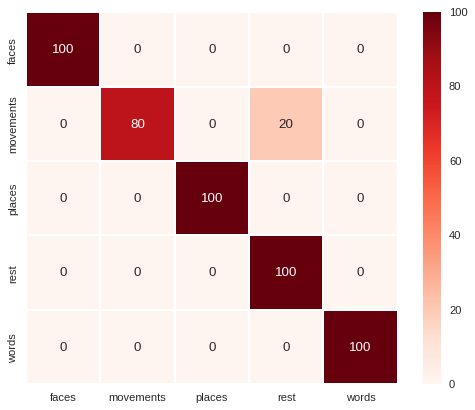

In [56]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

sns.heatmap(confDf.loc['True']['Predicted'].astype(int),
            square=True,cmap=('Reds'),vmin=0,vmax=100,fmt='.3g',
            linewidths=1,annot=True,ax=ax )
plt.show()

In [57]:
print "%i%% correct predictions!" % corrPcCorrect

96% correct predictions!
